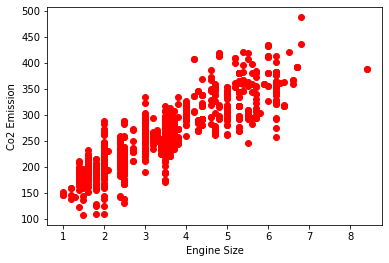

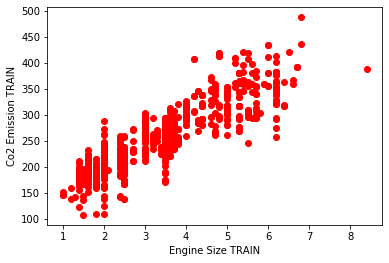

Coefficients =  [[10.99294947  6.94312326  2.23597529  6.90233143]]
Intercept =  [66.33141303]
MSE = 572.26
Variance score = 0.86


In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


# read data
df = pd.read_csv("FuelConsumption.csv")

# summarise data
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_CITY','FUELCONSUMPTION_HWY','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head()

# plot data
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS, color='red')
plt.xlabel("Engine Size")
plt.ylabel("Co2 Emission")
plt.show()

# split dataset into train and test
split = np.random.rand(len(cdf)) < 0.8
train = cdf[split]
test = cdf[~split]

# plot train data
plt.scatter(train.ENGINESIZE,train.CO2EMISSIONS,color='red')
plt.xlabel("Engine Size TRAIN")
plt.ylabel("Co2 Emission TRAIN")
plt.show()

#TRAIN DATA AND FIND COEFFICENTS
from sklearn import linear_model
regr = linear_model.LinearRegression()
x = np.asanyarray(train[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_HWY','FUELCONSUMPTION_CITY']])
y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(x,y)
print("Coefficients = ", regr.coef_)
print("Intercept = ", regr.intercept_)

#PREDICT DATA AND COMPARE
test_x = np.asanyarray(test[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_HWY','FUELCONSUMPTION_CITY']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])
test_y_ = regr.predict(test_x)

print("MSE = %.2f" % np.mean((test_y_ - test_y) ** 2))
print("Variance score = %.2f" % regr.score(test_x,test_y))